# Análisis espectral

chamuyooo blah blah blah python generacion de señales balha lbafadskfahsdf

Partiendo de las tres señales de audio grabadas, se determinó una manera de obtener curvas de nivel
de presión sonora en función del tiempo utilizando el lenguaje de programación python, tanto para el ruido de fondo como para el ruido
rosa.

Se diseño un banco de filtros de octava y un banco de filtros de tercio de octava según la
norma $ISO$ $61260$ utilizando el lenguaje python guardado en el módulo $filters.py$.

In [1]:
Motrar filtros graficar algunos

SyntaxError: invalid syntax (<ipython-input-1-d3b463776af3>, line 1)

Se filtran las señales de ruido rosa y de ruido de fondo utilizando los bancos de filtros ante-
riormente creados. Luego se obtienen los niveles equivalentes por banda. Finalmente, se confecciona gráficos de barras en donde se comparan los niveles equivalentes por bandas para las dos señales (un gráfico para divisiones de octava, y otro para divisiones de tercio
de octava).

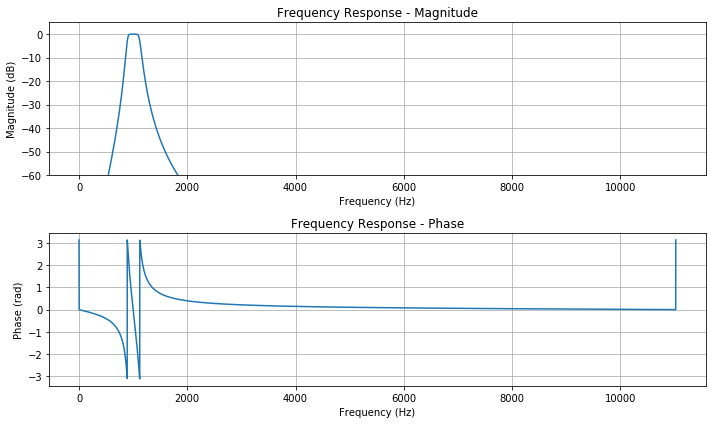

-172.4598708475981


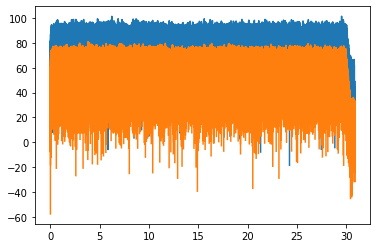

In [69]:
import filters 
import numpy as np
import spl_time
import librosa
import os
import matplotlib.pyplot as plt

freq = ["31.5","40","50","63","80","100","125","160","200","250","315","400","500","630","800","1000","1250","1600","2000","2500","3150","4000","5000","6300","8000","10000","12500","16000","20000"]
cutoff_31 = (27.84,35.08)
cutoff_1000 = (890.9,1122)

# path
path_pink_BackL = os.path.join("grabaciones","posicion l","pinknoise position BACK L.wav")
path_calibration_1 = os.path.join("grabaciones","posicion l","puretone position 3.wav")

#load audio
audio_pink_BackL, sr = librosa.load(path_pink_BackL)
audio_calibration_1, sr = librosa.load(path_calibration_1)

audio_pink_BackL = spl_time.calibration(audio_pink_BackL, audio_calibration_1)

# create and aply filters to the audio
b, a = filters.butter_filter("bandpass", sr, 4, cutoff_1000)
filters.plot_filter_response(b, a, sr)
pink_BackL_filtered = filters.apply_filter(b, a, audio_pink_BackL)

# rms
rms = np.sqrt(np.mean(np.square(pink_BackL_filtered)))
rms_spl = 20 * np.log10(rms / 20e-6)

# combert to dB
t1, audio_pink_BackL_spl = spl_time.spl_time(sr, audio_pink_BackL)
t2, pink_BackL_filtered_spl = spl_time.spl_time(sr, pink_BackL_filtered)

print(rms_spl)
plt.plot(t1, audio_pink_BackL_spl)
plt.plot(t2, pink_BackL_filtered_spl)


# audio_back, sr_back = librosa.load(path_back)

# audio_calib, sr_calib = librosa.load(path_calib)






In [75]:
rms = np.sqrt(np.mean(np.square(audio_pink_BackL)))
print(rms)
rms_spl = 20 * np.log10(rms / 20e-6)

print(rms_spl)



0.4440242
86.92753299809654


En las siguientes imagenes se ven los resultados obtenidos con el sonómetro

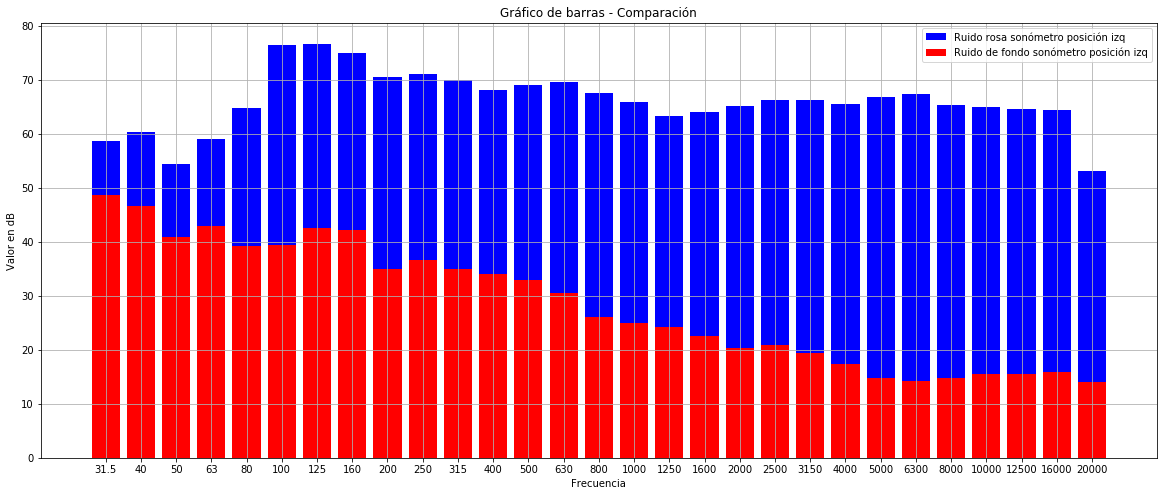

In [32]:
import matplotlib.pyplot as plt

freq = ["31.5","40","50","63","80","100","125","160","200","250","315","400","500","630","800","1000","1250","1600","2000","2500","3150","4000","5000","6300","8000","10000","12500","16000","20000"]

son_pink_posL = [58.7,60.4,54.5,59.1,64.7,76.5,76.7,74.9,70.6,71.0,69.9,68.2,69.0,69.6,67.6,65.8,63.3,64.1,65.2,66.3,66.2,65.6,66.9,67.3,65.4,64.9,64.6,64.5,53.1]

son_back_posL = [48.6,46.6,40.8,43.0,39.3,39.5,42.5,42.2,35.0,36.7,34.9,34.1,32.9,30.6,26.1,25.0,24.2,22.5,20.3,20.8,19.5,17.3,14.8,14.3,14.7,15.6,15.6,15.9,14.1]

fig, ax = plt.subplots(figsize=(20, 8))

# Barras para son_pink_posL_1 (color azul)
ax.bar(x=freq, height=son_pink_posL, color='blue', label='Ruido rosa sonómetro posición izq')

# Barras para son_pink_posL_2 (color rojo)
ax.bar(x=freq, height=son_back_posL, color='red', label='Ruido de fondo sonómetro posición izq')

ax.set_xlabel('Frecuencia')
ax.set_ylabel('Valor en dB')
ax.set_title('Gráfico de barras - Comparación')
ax.legend()
ax.grid()



comparacion blah blah chamuyoo guitarraa solo de chamuyooo

conclusionesss mas chamuyooo chat gpt etc